## 6 Steps Framework:
1. **Problem Definition**: To Determine whether the patient needs to go for a biopsy or not based on give features.
2. **Data**: The dataset that we are going to use is cervical-cancer-risk-classification
3. **Evalution**: Accuracy of the model
4. **Models**: RandomForestClassifier,XGBBoostClassifier

In [3]:
# Importing the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV

# Reading the data

In [4]:
df = pd.read_csv('/kaggle/input/cervical-cancer-risk-classification/kag_risk_factors_cervical_cancer.csv')

In [5]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [6]:
df['Biopsy'].value_counts()

Biopsy
0    803
1     55
Name: count, dtype: int64

# Preprocessing the Data

In [7]:
df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [9]:
df['Age'].max()

84

## Converting Non-int Columns to int data type

In [10]:
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype('category').cat.as_ordered()

In [11]:
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes + 1

In [12]:
X = df.drop('Biopsy',axis = 1)
Y = df['Biopsy']

# Evaluation

In [13]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,RocCurveDisplay
def score_model(model,X_test,Y_test):
    Y_preds = model.predict(X_test)
    scores = {
        "Accuracy": model.score(X_test,Y_test)*100,
        "Precision Score": precision_score(Y_test,Y_preds)*100,
        "Recall Score": recall_score(Y_test,Y_preds)*100,
        "F1 Score": f1_score(Y_test,Y_preds)*100,
        "Confusion Matrix": confusion_matrix(Y_test,Y_preds),
    }
    RocCurveDisplay.from_estimator(model,X_test,Y_test);
    return scores

In [14]:
from sklearn.model_selection import cross_val_score
def cross_validation_score(model,X,Y):
    score = {
        "Cross-Val Accuracry": np.mean(cross_val_score(model,X,Y,cv=5,scoring = 'accuracy'))*100,
        "Cross-Val Precision" : np.mean(cross_val_score(model,X,Y,cv = 5,scoring = 'precision'))*100,
        "Cross-Val Recall" : np.mean(cross_val_score(model,X,Y,cv = 5,scoring = 'recall'))*100,
        "Cross-Val F1 Score" : np.mean(cross_val_score(model,X,Y,cv = 5,scoring = 'f1'))*100
    }
    return score

# Features Visualisation

In [15]:
age_range = np.arange(10,100,10)
biopsy_needed = np.zeros(9)
biopsy_not_needed = np.zeros(9)


In [16]:
for i in range(len(df)):
    val = int(df.loc[i]['Age']/10)
    if df.loc[i]['Biopsy'] == 1:
        biopsy_needed[val] += 1
    else:
        biopsy_not_needed[val] += 1

In [17]:
vis_df = pd.DataFrame({
    "Age-less-than" : age_range,
    "Biopsy-Needed" : biopsy_needed,
    "Biopsy-Not-Needed" : biopsy_not_needed
})

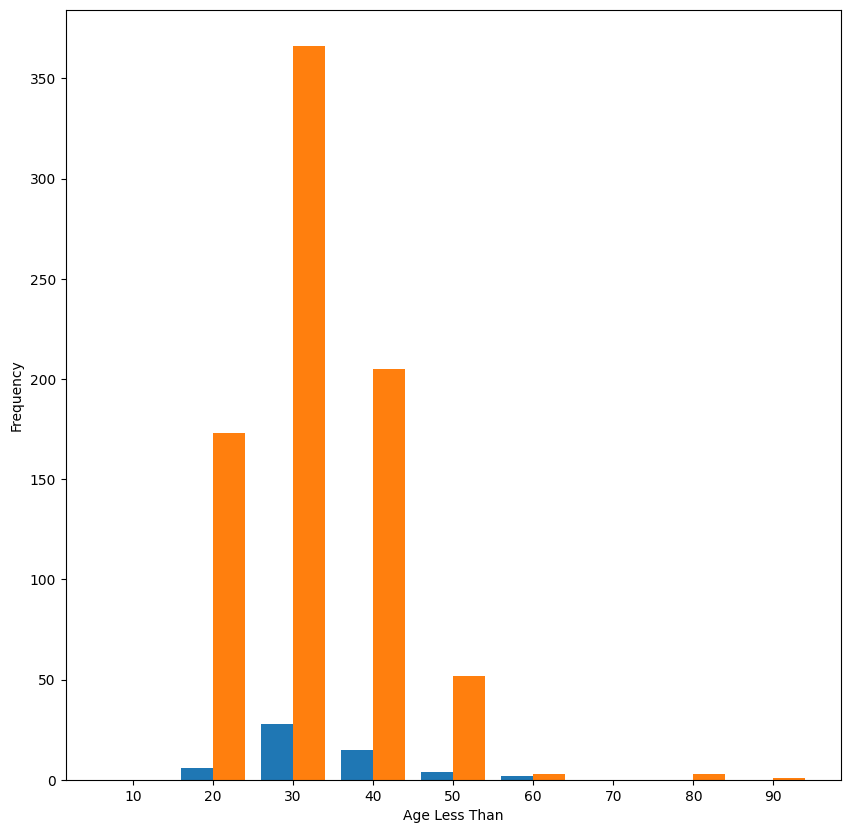

In [18]:
fig,ax = plt.subplots(figsize=(10,10))
ax.bar(age_range-2,biopsy_needed,4)
ax.bar(age_range+2,biopsy_not_needed,4)
plt.xticks(age_range);
plt.xlabel('Age Less Than')
plt.ylabel('Frequency');

In [19]:
corr_mat = df.corr()

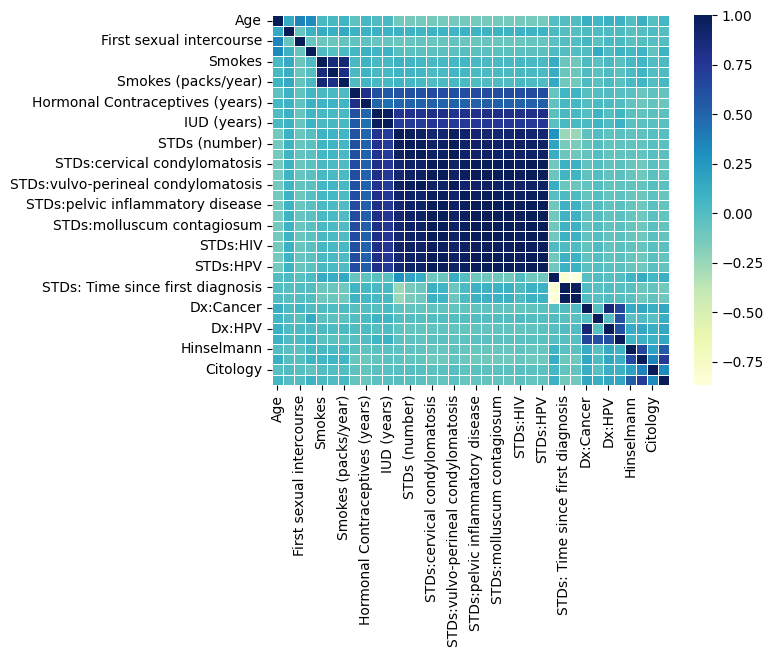

In [20]:
import seaborn as sns
sns.heatmap(corr_mat,linewidths=0.5,fmt="0.2f",cmap="YlGnBu");

In [21]:
corr_mat['Biopsy'].sort_values()[::-1]

Biopsy                                1.000000
Schiller                              0.733204
Hinselmann                            0.547417
Citology                              0.327466
Dx:Cancer                             0.160905
Dx:HPV                                0.160905
Dx                                    0.157607
Dx:CIN                                0.113172
STDs: Number of diagnosis             0.097449
Num of pregnancies                    0.081179
Age                                   0.055956
Smokes (packs/year)                   0.040514
Smokes                                0.027949
Smokes (years)                        0.013710
Number of sexual partners            -0.001874
First sexual intercourse             -0.002959
STDs                                 -0.017565
IUD (years)                          -0.021624
STDs (number)                        -0.034787
IUD                                  -0.035602
STDs:vulvo-perineal condylomatosis   -0.036903
STDs:condylom

# Modelling

In [22]:
np.random.seed(42)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [23]:
len(X_train),len(Y_train),len(X_test),len(Y_test)

(686, 686, 172, 172)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
def train_model(model,X_train,Y_train):
    np.random.seed(42)
    model = model.fit(X_train,Y_train)
    return model

In [26]:
rf_class = RandomForestClassifier(n_estimators = 100)
rf_base_model = train_model(rf_class,X_train,Y_train)

{'Accuracy': 94.76744186046511,
 'Precision Score': 62.5,
 'Recall Score': 45.45454545454545,
 'F1 Score': 52.63157894736842,
 'Confusion Matrix': array([[158,   3],
        [  6,   5]])}

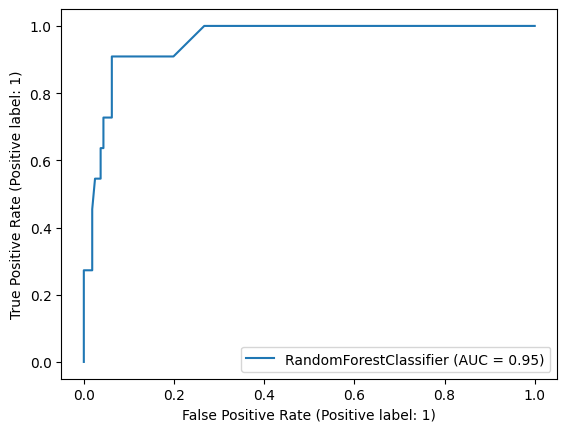

In [27]:
score_model(rf_base_model,X_test,Y_test)

In [28]:
cross_validation_score(rf_base_model,X,Y)

{'Cross-Val Accuracry': 94.63960288317693,
 'Cross-Val Precision': 66.07575757575758,
 'Cross-Val Recall': 45.45454545454546,
 'Cross-Val F1 Score': 53.18037518037517}

In [29]:
def hyper_tuning_gridsearch(model,X_train,Y_train,model_grid):
    grid_model = GridSearchCV(model,param_grid = model_grid,cv = 5,verbose = True)
    return grid_model.fit(X_train,Y_train)

In [30]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
rf_grid_params = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [31]:
# tuned_rf_model = hyper_tuning_gridsearch(rf_base_model,X_train,Y_train,rf_grid_params)

In [32]:
# import pickle
# pickle.dump(tuned_rf_model,open('tuned_rf_model.pkl','wb'))

In [33]:
# score_model(tuned_rf_model,X_test,Y_test)

In [34]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
xgb_class = xgb.XGBClassifier(
    n_estimator = 300,
    max_depth = 20,
    n_jobs = -1,
    max_leaves = 100
)
xgb_base_model = train_model(xgb_class,X_train,Y_train)

[07:24:57] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.



{'Accuracy': 94.18604651162791,
 'Precision Score': 53.333333333333336,
 'Recall Score': 72.72727272727273,
 'F1 Score': 61.53846153846153,
 'Confusion Matrix': array([[154,   7],
        [  3,   8]])}

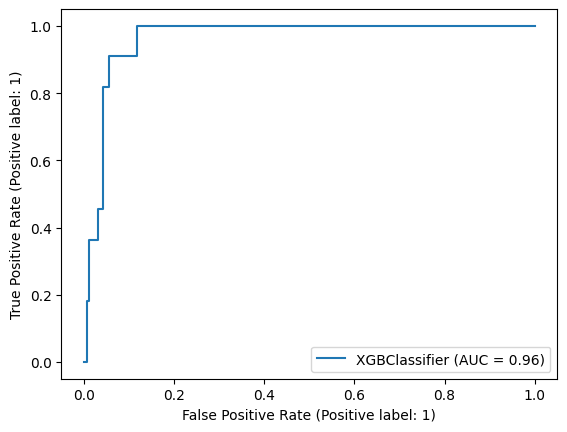

In [35]:
score_model(xgb_base_model,X_test,Y_test)

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_class = GradientBoostingClassifier()
gbc_base_model = train_model(gbc_class,X_train,Y_train)

{'Accuracy': 95.34883720930233,
 'Precision Score': 60.0,
 'Recall Score': 81.81818181818183,
 'F1 Score': 69.23076923076923,
 'Confusion Matrix': array([[155,   6],
        [  2,   9]])}

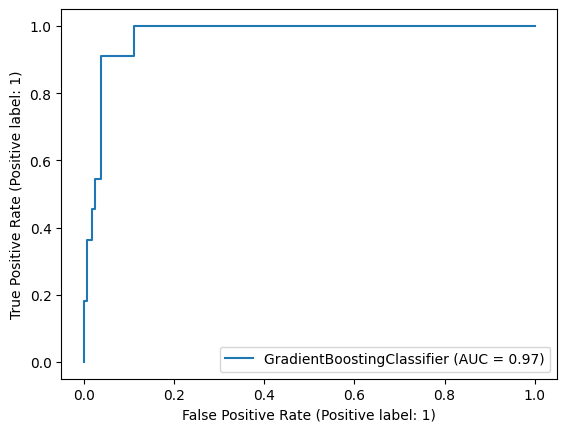

In [37]:
score_model(gbc_base_model,X_test,Y_test)

In [38]:
from sklearn.svm import SVC
svc_class = SVC(gamma = 'auto')
svc_base_model = train_model(svc_class,X_train,Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Accuracy': 93.6046511627907,
 'Precision Score': 0.0,
 'Recall Score': 0.0,
 'F1 Score': 0.0,
 'Confusion Matrix': array([[161,   0],
        [ 11,   0]])}

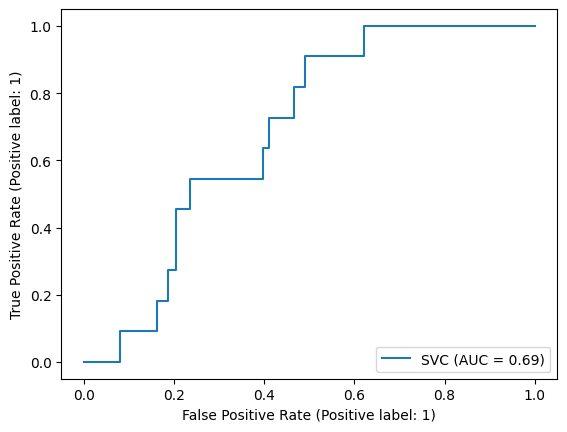

In [39]:
score_model(svc_base_model,X_test,Y_test)

In [40]:
from sklearn.naive_bayes import GaussianNB
nb_class = GaussianNB()
nb_base_model = train_model(nb_class,X_train,Y_train)

{'Accuracy': 89.53488372093024,
 'Precision Score': 37.03703703703704,
 'Recall Score': 90.9090909090909,
 'F1 Score': 52.63157894736842,
 'Confusion Matrix': array([[144,  17],
        [  1,  10]])}

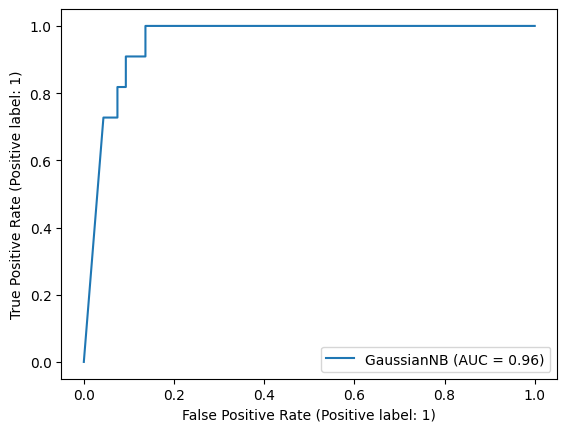

In [41]:
score_model(nb_base_model,X_test,Y_test)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
kn_class = KNeighborsClassifier(n_neighbors=3)
kn_base_model = train_model(kn_class,X_train,Y_train)

{'Accuracy': 93.02325581395348,
 'Precision Score': 0.0,
 'Recall Score': 0.0,
 'F1 Score': 0.0,
 'Confusion Matrix': array([[160,   1],
        [ 11,   0]])}

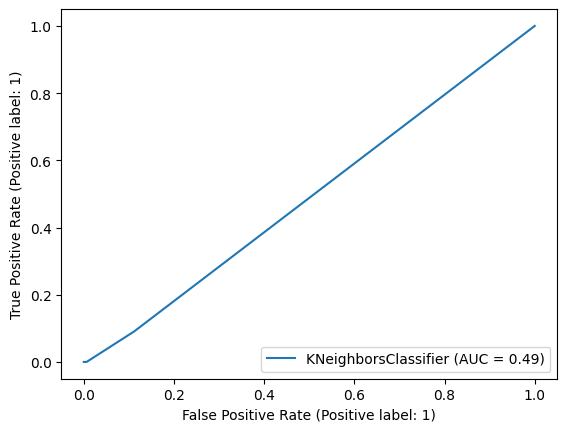

In [43]:
score_model(kn_base_model,X_test,Y_test)

In [44]:
from sklearn.linear_model import LogisticRegression
lg_class = LogisticRegression(random_state = 0)
lg_base_model = train_model(lg_class,X_train,Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Accuracy': 95.34883720930233,
 'Precision Score': 63.63636363636363,
 'Recall Score': 63.63636363636363,
 'F1 Score': 63.63636363636363,
 'Confusion Matrix': array([[157,   4],
        [  4,   7]])}

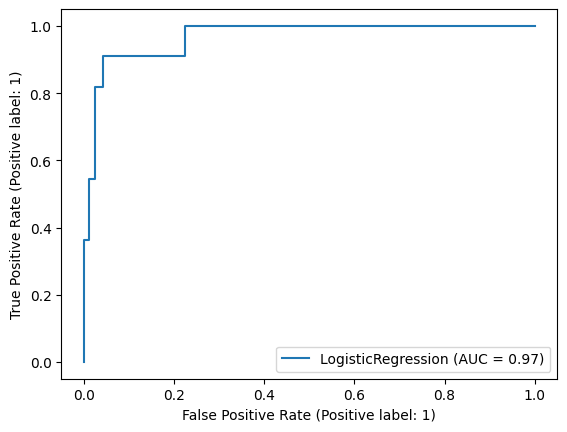

In [45]:
score_model(lg_base_model,X_test,Y_test)

In [46]:
import tensorflow as tf
np.random.seed(42)
def create_neural_network_model(input_shape,output_shape,epochs):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(15,activation='sigmoid',input_dim = input_shape))
    model.add(tf.keras.layers.Dense(15,activation='sigmoid'))
    model.add(tf.keras.layers.Dense(output_shape,activation='sigmoid'))
    print(model.summary())
    model.compile(loss = 'binary_crossentropy',optimizer='Adam')
    model.fit(X_train,Y_train,epochs = epochs)
    return model

In [47]:
ann_model = create_neural_network_model(len(X_train.columns),1,100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                540       
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 796
Trainable params: 796
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.5231
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4014
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3298
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.29

In [48]:
ann_model_preds = ann_model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [49]:
ann_model_preds = [1 if x >= 0.5 else 0 for x in ann_model_preds]

In [50]:
abmpreds = ann_model.predict(X_test)
for i in range(len(abmpreds)):
    if Y_test.iloc[i] == 1:
        print(abmpreds[i])

6/6 [==============================] - 0s 1ms/step
[0.77118766]
[0.80271614]
[0.02178233]
[0.75603664]
[0.01118996]
[0.6522249]
[0.13540226]
[0.6581032]
[0.3518136]
[0.47566786]
[0.7879043]


In [51]:
accuracy_score(Y_test,ann_model_preds)

0.9651162790697675

In [52]:
from sklearn.neural_network import MLPClassifier
mlp_class = MLPClassifier(random_state=42)
mlp_base_model = train_model(mlp_class,X_train,Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Accuracy': 95.93023255813954,
 'Precision Score': 83.33333333333334,
 'Recall Score': 45.45454545454545,
 'F1 Score': 58.82352941176471,
 'Confusion Matrix': array([[160,   1],
        [  6,   5]])}

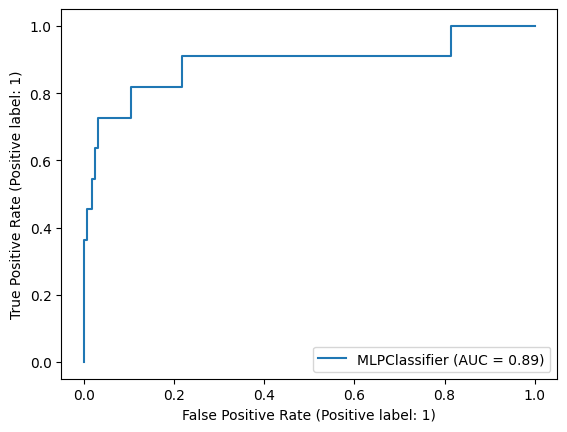

In [53]:
score_model(mlp_base_model,X_test,Y_test)

In [54]:
from sklearn.ensemble import AdaBoostClassifier
ada_class = AdaBoostClassifier(n_estimators = 100)
ada_base_model = train_model(ada_class,X_train,Y_train)

{'Accuracy': 94.76744186046511,
 'Precision Score': 60.0,
 'Recall Score': 54.54545454545454,
 'F1 Score': 57.14285714285713,
 'Confusion Matrix': array([[157,   4],
        [  5,   6]])}

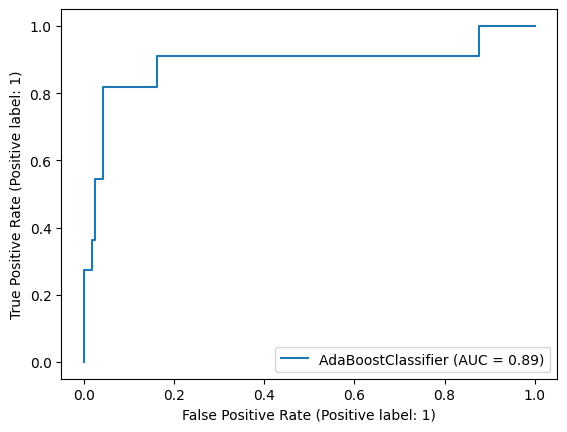

In [55]:
score_model(ada_base_model,X_test,Y_test)

In [56]:
def democratic_voting(test_data_1,test_data_2,test_data_3):
    res = []
    for i in range(len(test_data_1)):
        count_zeros = 0
        count_ones = 0
        count_zeros += 1 if test_data_1[i] == 0 else 0
        count_zeros += 1 if test_data_2[i] == 0 else 0
        count_zeros += 1 if test_data_3[i] == 0 else 0
        count_ones += 1 if test_data_1[i] == 1 else 0
        count_ones += 1 if test_data_2[i] == 1 else 0
        count_ones += 1 if test_data_3[i] == 1 else 0
        res.append(1 if count_ones > count_zeros else 0)
#         print(count_zeros,count_ones)
    return np.array(res)

In [57]:
def MakeAVote(model1,model2,model3,test_data):
    mdl1_preds = model1.predict(test_data)
    mdl2_preds = model2.predict(test_data)
    mdl3_preds = model3.predict(test_data)
    return democratic_voting(mdl1_preds,mdl2_preds,mdl3_preds)

In [58]:
low_acc = MakeAVote(nb_base_model,kn_base_model,svc_base_model,X_test)
med_acc = MakeAVote(xgb_base_model,rf_base_model,ada_base_model,X_test)
high_acc = MakeAVote(lg_base_model,gbc_base_model,mlp_base_model,X_test)

In [59]:
high_acc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [60]:
dem_voting = democratic_voting(low_acc,med_acc,high_acc)

In [61]:
def count_ones(preds):
    cnt = 0
    for i in range(len(preds)):
        cnt += 1 if preds[i] == 1 else 0
    return cnt

In [62]:
count_ones(svc_base_model.predict(X_test))

0

In [63]:
accuracy_score(Y_test,dem_voting)

0.9534883720930233

In [64]:
print(accuracy_score(Y_test,low_acc))
print(accuracy_score(Y_test,med_acc))
print(accuracy_score(Y_test,high_acc))

0.936046511627907
0.9476744186046512
0.9534883720930233


# Hyper Parameter Tuning MLP

In [65]:
# mlp_grid = {
#     'hidden_layer_sizes': [(10,30,10),(20,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }

In [66]:
# mlp_tuned_model = hyper_tuning_gridsearch(mlp_base_model,X_train,Y_train,mlp_grid)

In [67]:
# score_model(mlp_tuned_model,X_test,Y_test)

# Table Of Results

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


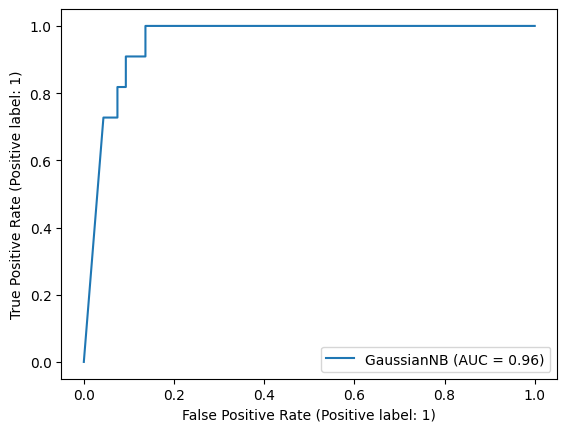

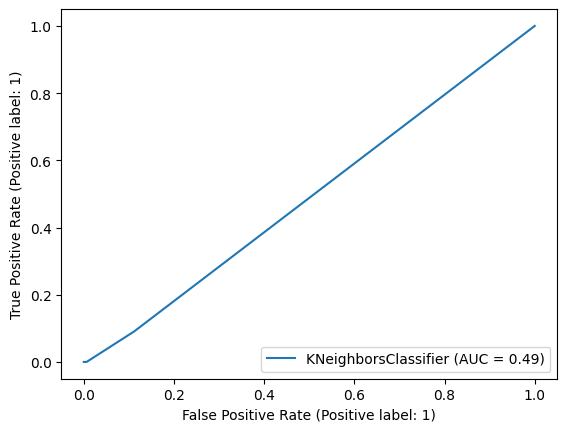

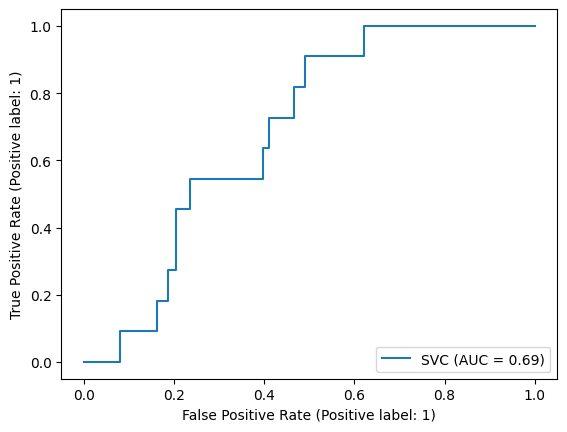

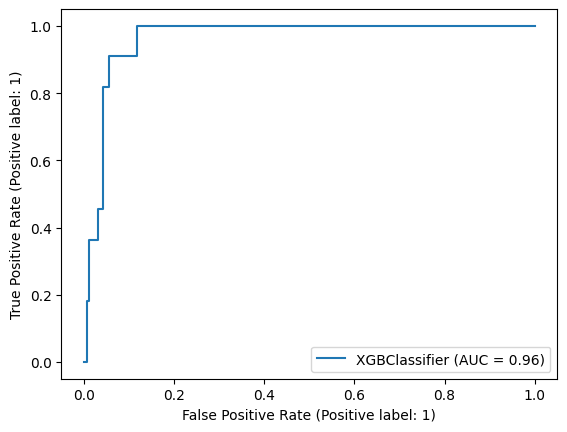

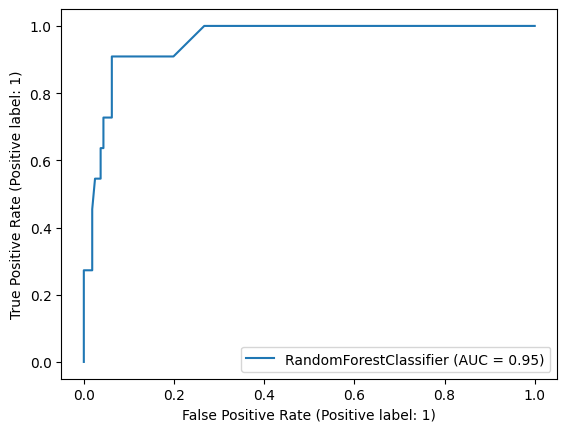

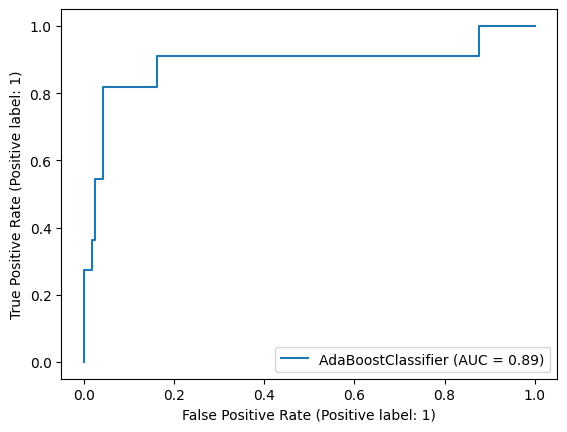

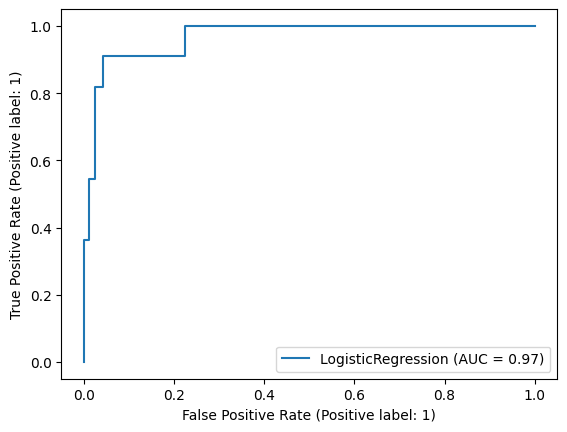

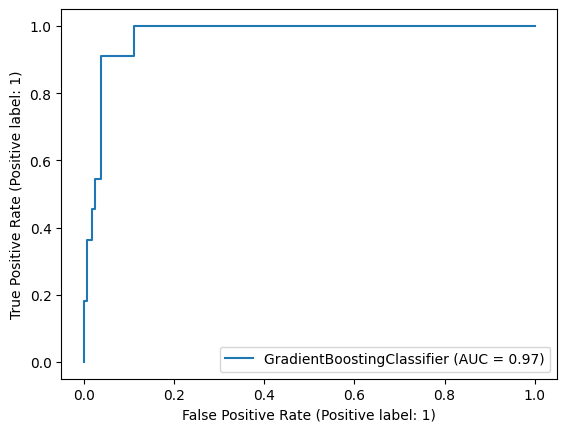

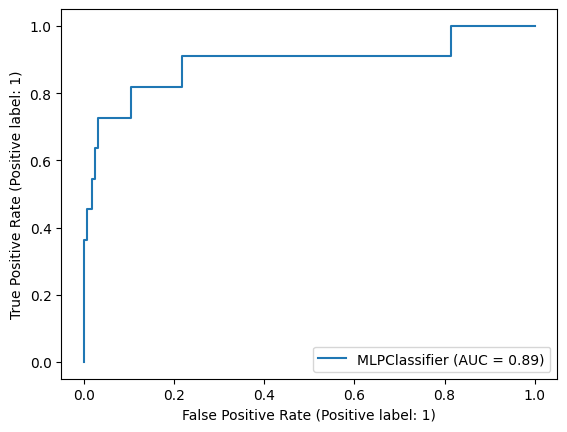

In [68]:
res_tab = pd.DataFrame({
    "GausianNB" : score_model(nb_base_model,X_test,Y_test),
    "KNN" : score_model(kn_base_model,X_test,Y_test),
    "SVM" : score_model(svc_base_model,X_test,Y_test),
    "XGBBoost" : score_model(xgb_base_model,X_test,Y_test),
    "Random Forest" : score_model(rf_base_model,X_test,Y_test),
    "AdaBoost" : score_model(ada_base_model,X_test,Y_test),
    "Logistic Regression" : score_model(lg_base_model,X_test,Y_test),
    "Gradient Boost Classifier" : score_model(gbc_base_model,X_test,Y_test),
    "MutilevelPerceptron" : score_model(mlp_base_model,X_test,Y_test)
})

In [69]:
res_tab

,GausianNB,KNN,SVM,XGBBoost,Random Forest,AdaBoost,Logistic Regression,Gradient Boost Classifier,MutilevelPerceptron
Accuracy,89.534884,93.023256,93.604651,94.186047,94.767442,94.767442,95.348837,95.348837,95.930233
Precision Score,37.037037,0.0,0.0,53.333333,62.5,60.0,63.636364,60.0,83.333333
Recall Score,90.909091,0.0,0.0,72.727273,45.454545,54.545455,63.636364,81.818182,45.454545
F1 Score,52.631579,0.0,0.0,61.538462,52.631579,57.142857,63.636364,69.230769,58.823529
Confusion Matrix,"[[144, 17], [1, 10]]","[[160, 1], [11, 0]]","[[161, 0], [11, 0]]","[[154, 7], [3, 8]]","[[158, 3], [6, 5]]","[[157, 4], [5, 6]]","[[157, 4], [4, 7]]","[[155, 6], [2, 9]]","[[160, 1], [6, 5]]"
